In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/letterdata.csv')

In [3]:
df.shape

(20000, 17)

In [4]:
df


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
df.columns


Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [6]:
# Take input data as Age and Estimated Salary
x = df.drop('letter', axis=1)

# Take output data as Purchased
y = df['letter']

In [7]:
x.shape

(20000, 16)

In [8]:
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object

<Axes: xlabel='count', ylabel='letter'>

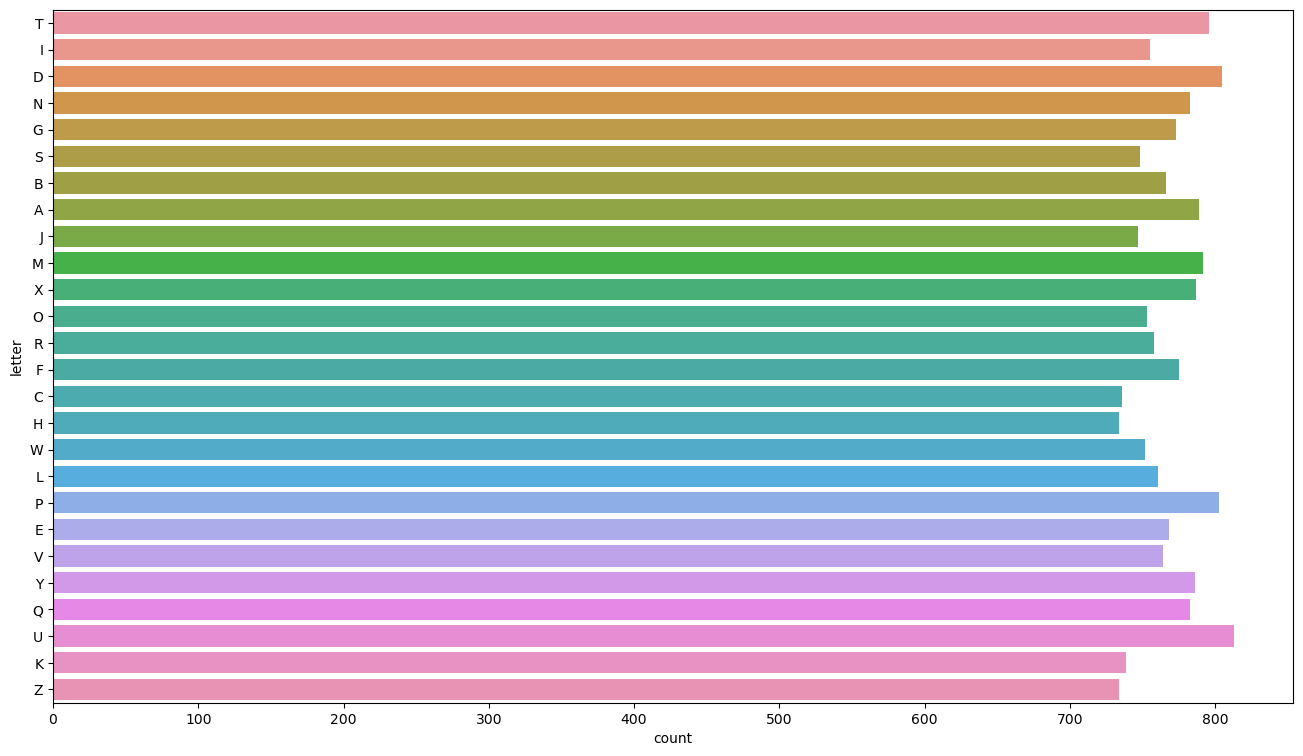

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(y=y)#, palette='tab10',hue='y')

In [10]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [11]:
x.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [12]:
##### Cross Validation

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,stratify=y, test_size=0.20)

In [15]:
x_train.shape

(16000, 16)

In [16]:
x_test.shape

(4000, 16)

In [17]:
##### Build the model

In [18]:
from sklearn.svm import SVC

In [44]:
svc=SVC(kernel='poly',random_state=0)
# change the kernel for getting accurate result.
# Linear:0.85
#rbf:0.928
#poly:0.94
#sigmoid:0.035

In [45]:
svc.fit(x_train,y_train)

SVC(kernel='poly', random_state=0)

In [46]:
y_pred = svc.predict(x_test)

In [47]:
y_pred

array(['A', 'H', 'S', ..., 'I', 'B', 'L'], dtype=object)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

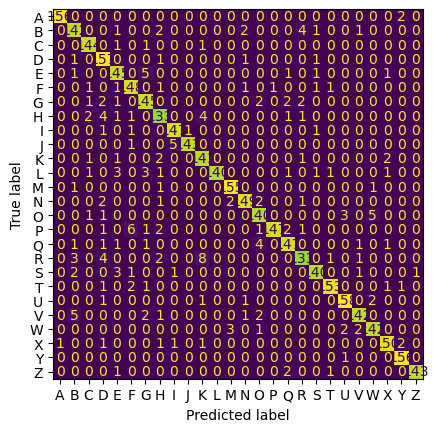

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, colorbar = False)

In [50]:
accuracy_score(y_test,y_pred)

0.949

In [51]:
# Linear:0.85
#rbf:0.928
#poly:0.94
#sigmoid:0.035

In [52]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           A       0.99      0.99      0.99       158
           B       0.91      0.93      0.92       153
           C       0.95      0.98      0.97       147
           D       0.89      0.98      0.93       161
           E       0.91      0.94      0.93       154
           F       0.93      0.95      0.94       155
           G       0.91      0.94      0.92       155
           H       0.90      0.90      0.90       147
           I       0.95      0.97      0.96       151
           J       0.99      0.96      0.98       149
           K       0.90      0.95      0.93       148
           L       1.00      0.92      0.96       152
           M       0.97      0.98      0.97       158
           N       0.96      0.95      0.96       157
           O       0.92      0.93      0.93       150
           P       0.99      0.91      0.95       161
           Q       0.94      0.94      0.94       157
           R       0.93    

In [60]:
svc=SVC(kernel='poly',random_state=0)


In [61]:
new = x_test.iloc[[37,675,123,2045,332,3567],:]

In [68]:
svc.fit(x_train,y_train)

SVC(kernel='poly', random_state=0)

In [69]:
svc.predict(new)

array(['Z', 'A', 'F', 'J', 'Y', 'P'], dtype=object)

In [66]:
y_test.iloc[[37,675,123,2045,332,3567]].values

array(['Z', 'A', 'F', 'J', 'Y', 'P'], dtype=object)

In [86]:
x = np.arange(1,100,1)

In [87]:
y = np.arange(1,100,0.5)

In [88]:
y

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5,
       34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. ,
       39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5,
       45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. ,
       50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. , 55.5,
       56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. , 60.5, 61. ,
       61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5, 66. , 66.5,
       67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5, 72. ,
       72.5, 73. , 73.5, 74. , 74.5, 75. , 75.5, 76

In [89]:
x.mean()

50.0

In [90]:
y.mean()

50.25